In [10]:
import torch
import matplotlib.pyplot as plt
import EIANN.utils as ut
import EIANN.plot as pt
import EIANN._network as nt


from tqdm.autonotebook import tqdm
import numpy as np
import matplotlib.gridspec as gs
%load_ext autoreload
%autoreload 2

pt.update_plot_defaults()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### MNIST Networks

In [ ]:
train_dataloader, train_sub_dataloader, val_dataloader, test_dataloader, data_generator = ut.get_MNIST_dataloaders(sub_dataloader_size=20_000)

In [ ]:
# Build network
network_name = "EIANN_1_hidden_mnist_vanBP"
config_path = f"../network_config/MNIST_templates/{network_name}.yaml"
saved_network_path = f"saved_networks/{network_name}.pkl"
bp = ut.build_EIANN_from_config(config_path, network_seed=66049)

# Train network
data_seed = 257
data_generator.manual_seed(data_seed)
bp.train(train_sub_dataloader, 
                test_dataloader, 
                epochs=1,
                val_interval=(0,-1,500),
                store_history=True, 
                store_params=True,
                status_bar=True)
ut.save_network(bp, path=saved_network_path)

bp_network = ut.load_network(saved_network_path)

In [ ]:
plt.plot(bp_network.val_loss_history)

In [ ]:
pt.plot_batch_accuracy(bp_network, test_dataloader, population='all')

### Spiral Networks

In [ ]:
spiral_train_dataloader, spiral_val_dataloader, spiral_test_dataloader, spiral_data_generator = ut.get_spiral_dataloaders(N=2000)

# Build network
network_name = "EIANN_2_hidden_spiral_bpDale_fixed_I"
# config_path = f"../network_config/spiral/{network_name}.yaml" # For optimized network_config files
config_path = f"../optimize/network_config/spiral/{network_name}.yaml" # For network_config files to be optimized
saved_network_path = f"../saved_networks/{network_name}.pkl"
spiral_net = ut.build_EIANN_from_config(config_path, network_seed=0)

# Train network
data_seed = 1
spiral_data_generator.manual_seed(data_seed)
spiral_net.train(spiral_train_dataloader, 
                spiral_test_dataloader, 
                epochs=1,
                val_interval=(0,-1,500),
                store_history=True,
                store_dynamics=False, 
                store_params=True,
                status_bar=True)
# ut.save_network(spiral_net, path=saved_network_path)
# network = ut.load_network(saved_network_path)

Epochs: 100%|██████████| 1/1 [01:30<00:00, 90.63s/it]


Batch accuracy = 60.66999816894531%


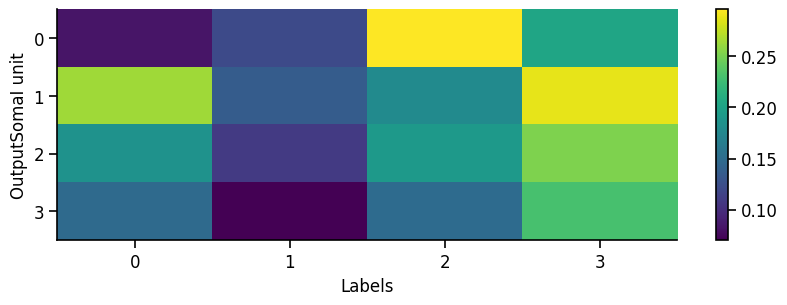

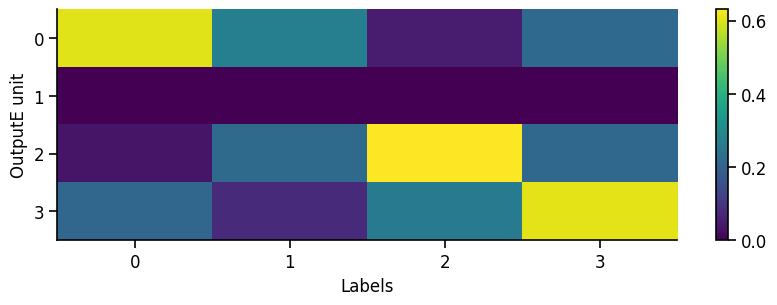

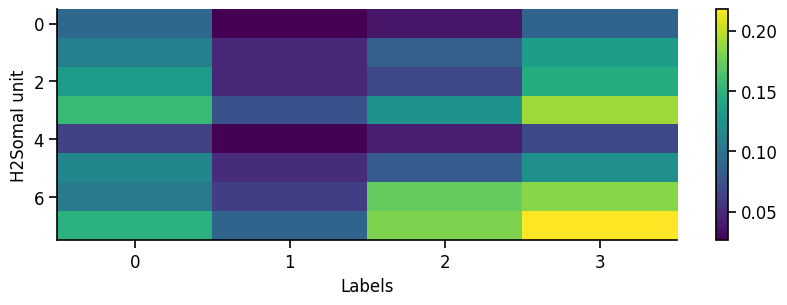

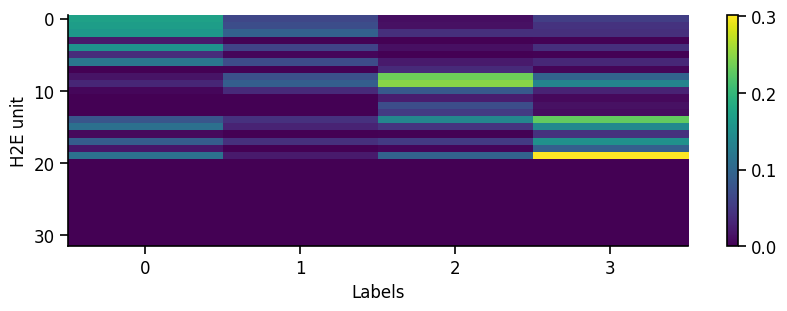

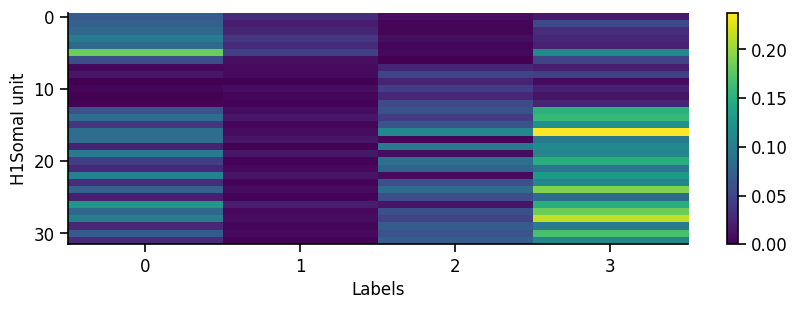

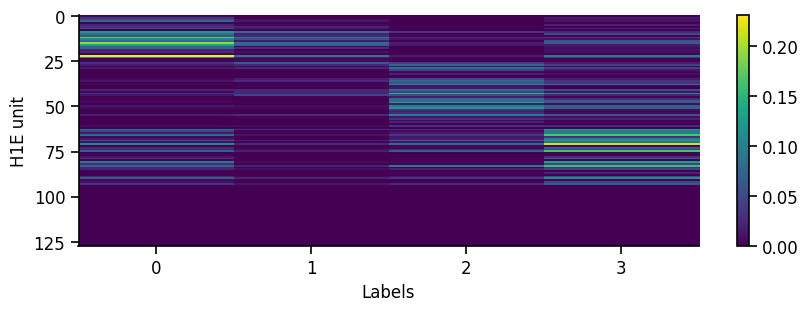

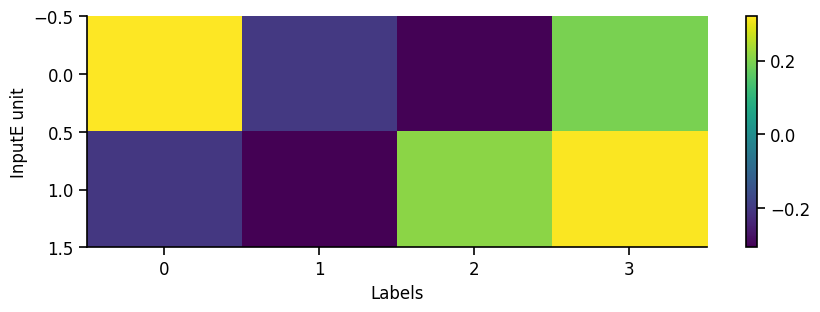

In [13]:
pt.plot_batch_accuracy(spiral_net, spiral_test_dataloader, population='all')

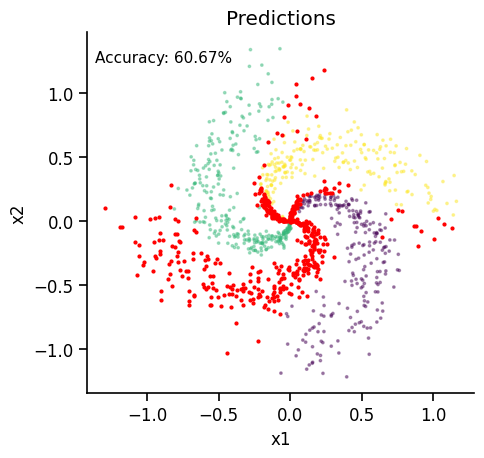

In [14]:
pt.plot_spiral_accuracy(spiral_net, spiral_test_dataloader)

In [ ]:
pt.plot_network_dynamics(spiral_net)

In [ ]:
percent_correct, average_pop_activity_dict = ut.compute_test_activity(spiral_net, spiral_test_dataloader, sort=True)

In [ ]:
average_pop_activity_dict['InputE']

In [ ]:
spiral_net.Input.E.activity_history

In [ ]:
# Test batch inputs
inputs = spiral_net.Input.E.activity
inputs

In [ ]:
# Predicted labels

outputs = spiral_net.Output.E.activity
_, predicted = torch.max(outputs, 1)
predicted

In [ ]:
dataloader_iter = spiral_test_dataloader
on_device = False

for sample_idx, sample_data, sample_target in dataloader_iter:
    sample_data = torch.squeeze(sample_data)
    sample_target = torch.squeeze(sample_target)
    if not on_device:
        if sample_data.device == spiral_net.device:
            on_device = True
        else:
            sample_data = sample_data.to(spiral_net.device)
            sample_target = sample_target.to(spiral_net.device)

            print(sample_data)
            print(sample_target)
            
    break

# sample_target has the test labels

In [ ]:
sample_target

In [ ]:
# Test labels

_, test_labels = torch.max(sample_target, 1)
test_labels

In [ ]:
# Check to see if we found right things (we did)

correct = (test_labels == predicted).sum().item()
total = test_labels.size(0)
accuracy = correct / total
accuracy

In [ ]:
plt.figure()
plt.imshow(spiral_net.H1.E.forward_dendritic_state_history, aspect='auto', interpolation='none')
plt.colorbar()

In [ ]:
plt.figure()
plt.plot(torch.mean(spiral_net.H1.E.forward_dendritic_state_history, dim=1))

In [ ]:
plt.figure()
# plt.plot(torch.mean(torch.abs(spiral_bp.H2.E.forward_dendritic_state_history), dim=1))
plt.imshow(spiral_net.H2.E.forward_dendritic_state_history.T, aspect='auto', interpolation='none')
plt.colorbar()

In [ ]:
plt.figure()
# plt.plot(torch.mean(spiral_bp.Output.E.plateau_history, dim=1))
plt.imshow(spiral_net.Output.E.plateau_history.T, aspect='auto', interpolation='none')
# plt.xlim(0, 1000)
plt.colorbar()

In [ ]:
plt.figure()
# plt.plot(torch.mean(spiral_bp.Output.E.plateau_history, dim=1))
plt.imshow(spiral_net.Output.E.activity_history[-10:].T, aspect='auto', interpolation='none')
# plt.xlim(0, 10)
plt.colorbar()

In [ ]:
plt.figure()
plt.plot(torch.mean(spiral_net.H2.E.H2.E.weight_history, dim=(1,2)))

In [ ]:
spiral_net.H2.E.attribute_history_dict.keys()

In [ ]:
plt.plot(spiral_net.val_loss_history)

In [ ]:
plt.plot(spiral_net.loss_history)

In [ ]:
index, data, label = next(iter(spiral_test_dataloader))

print(spiral_net.forward(data))
print(label)

In [ ]:
plt.plot(label[:,1])